In [838]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import accuracy_score

In [1022]:
###Importing the dataset

df=pd.read_csv("energydata_complete.csv")

### Descriptive Statistics

In [938]:
df.shape

(19735, 29)

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [243]:
pd.DataFrame(df['lights'].value_counts()).T

,0,10,20,30,40,50,60,70
lights,15252,2212,1624,559,77,9,1,1


In [ ]:
df.corr()

In [181]:
15252/19735

0.7728401317456296

### Checking for columns with high correlation

In [1138]:
corr=df.corr()
print("Features with high correlation >0.88\n")
print("Feature1\tFeature2\tCorrelation")

for i in range(len(corr.columns)):
    #print("i= ", i)
    for j in range(i):
        #print("j= ", j)
        if(corr.iloc[i,j]>0.88):
            print(corr.columns[i],"\t\t",corr.columns[j],"\t\t", round(corr.iloc[i,j],3))
            

Features with high correlation >0.88

Feature1	Feature2	Correlation
T3 		 T1 		 0.892
RH_4 		 RH_1 		 0.88
RH_4 		 RH_3 		 0.899
T5 		 T1 		 0.885
T5 		 T3 		 0.888
RH_7 		 RH_4 		 0.894
T8 		 T7 		 0.882
RH_8 		 RH_7 		 0.884
T9 		 T3 		 0.901
T9 		 T4 		 0.889
T9 		 T5 		 0.911
T9 		 T7 		 0.945
T_out 		 T6 		 0.975
rv2 		 rv1 		 1.0


### Dropping the columns

In [310]:
df_filter=df.drop(columns =['date','lights','T3','T_out','rv1','rv2','RH_4','T4','T7','RH_7','T5'])

In [311]:
df_filter.shape

(19735, 18)

### Outliers detection and removal

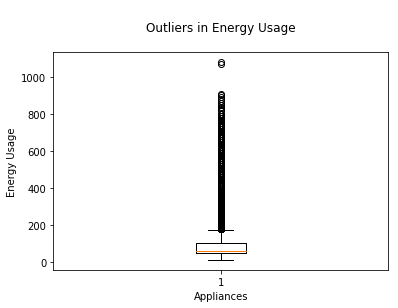

In [312]:
### For Appliances
plt.boxplot(df_filter['Appliances'])
plt.title("\nOutliers in Energy Usage\n")
plt.xlabel("Appliances")
plt.ylabel("Energy Usage")
plt.show()

In [313]:
df['Appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

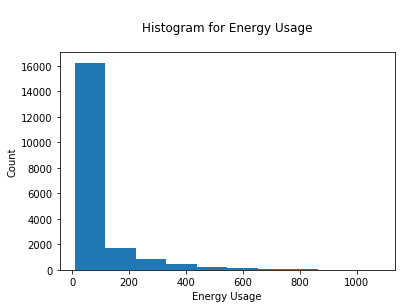

In [314]:
plt.hist(df_filter['Appliances'])
plt.title("\nHistogram for Energy Usage\n")
plt.xlabel("Energy Usage")
plt.ylabel("Count")
plt.show()

In [315]:
df_filter[df_filter['Appliances']>175].shape

(2138, 18)

In [316]:
2138/19735

0.10833544464149987

In [317]:
def outlier(df_with_outliers):
    df_no_outliers = df_with_outliers[df_with_outliers['Appliances']<175]
    return(df_no_outliers)

### Feature Scaling

In [318]:
def feature_scaling(df_unscaled):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_unscaled)
    scaled_data = pd.DataFrame(scaled_data, columns = df_unscaled.columns)
    return(scaled_data)

### Accuracy Metrics Calculation

In [319]:
def calculate_metrics(actual,predicted,rows):
    cf=round((((predicted-actual)**2).sum())/(2*rows),4)   ### Cost
    mse = round((np.mean((actual - predicted)**2)),4)  ### Mean Squared Error
    mae = round((np.mean(abs(actual - predicted))),4)       ### Mean Absolute Error
    
    actual_mean = actual.mean()
    tss = np.sum((actual - actual_mean)**2)
    rss = np.sum((actual - predicted)**2)
    
    r_squared = round((1 - (rss/tss)),4)         ### R Squared
    
    return (cf,mse,mae,r_squared)

### Gradient Descent for Linear Regression

In [934]:
###Initialisations

def GD_Linear(X_train, X_test, y_train, y_test,exp):
    if exp == 1:
        lrate=[0.005,0.007,0.01]  ###Learning Rates with increasing step sizes
        threshold=[0.1]
        iterations=1000
    if exp == 2:
        lrate=[0.01]  ###Learning Rates with increasing step sizes
        threshold=[0.005,0.01,0.1]
        iterations=2000
    if exp == 3 or exp == 4:
        lrate=[0.01]
        threshold=[0.1]
        iterations=1000
    beta_dict=dict()
    cf_dict=dict()
    mse_train=dict()
    mae_train=dict()
    r_squared=dict()
    ####

    rows=X_train.shape[0]
    n=X_train.shape[1]+1
    xt=X_train.values.transpose()

    for alpha in lrate:
        for t in threshold:
            p_diff_cost=[0]*n
            beta=[0.5]*n
            cf=[0]*iterations
            mse=[0]*iterations
            mae=[0]*iterations
            r2=[0]*iterations
            flag=0
            for iter in range(iterations):
                for k in range(n):
                    if(k == 0):
                        p_diff_cost[0]=((beta[0]+np.dot(beta[1:],xt))-y_train).sum()
                    else:
                        p_diff_cost[k]=np.dot((beta[0]+(np.dot(beta[1:],xt))-y_train),X_train.iloc[:,k-1])

                for bit in range(n):
                    beta[bit]=round((beta[bit]-(alpha*p_diff_cost[bit])/rows),4)

                pred=beta[0]+np.dot(beta[1:],xt)

                cf[iter],mse[iter],mae[iter],r2[iter] = calculate_metrics(y_train,pred,rows)
                if cf[iter-1] - cf[iter]<=t and flag == 0 and iter>0 and exp == 1:
                    print("With learning rate of %.3f, cost fuction converged at iteration %d" %(alpha,iter))
                    flag=1

                if cf[iter-1] - cf[iter]<=t and exp == 2 and iter>0:
                    print("Convergence with threshold %f reached at iteration %d" %(t,iter))
                    beta_dict[t], cf_dict[t],mse_train[t],mae_train[t],r_squared[t] = beta,cf,mse,mae,r2
                    break

        if exp == 1 or exp==3 or exp == 4:
            beta_dict[alpha], cf_dict[alpha],mse_train[alpha],mae_train[alpha],r_squared[alpha] = beta,cf,mse,mae,r2
        
    return(beta_dict,cf_dict,mse_train,mae_train,r_squared)

In [1120]:
df_no_outliers = outlier(df_filter) ###Outlier Removal
df_scaled = feature_scaling(df_no_outliers)  ###Normalisation of features

x=df_scaled.iloc[:,1:]
y=df_no_outliers['Appliances']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

beta_dict,cf_dict,mse_train,mae_train,r_squared = GD_Linear(X_train, X_test, y_train, y_test,1)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


With learning rate of 0.005, cost fuction converged at iteration 585
With learning rate of 0.007, cost fuction converged at iteration 453
With learning rate of 0.010, cost fuction converged at iteration 347


### Plots

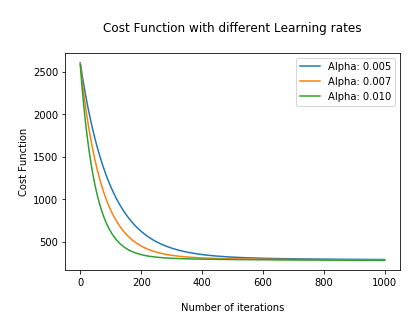

In [1123]:
for i in [0.005,0.007,0.01]:
    plt.plot(cf_dict[i],label='Alpha: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nCost Function")
plt.title("\nCost Function with different Learning rates\n")
plt.show()

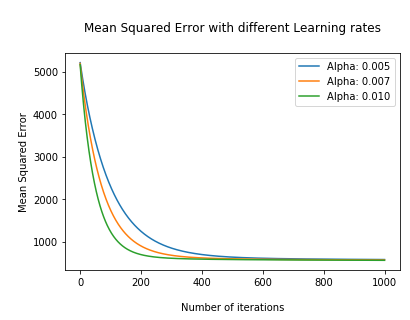

In [1124]:
for i in [0.005,0.007,0.01]:
    plt.plot(mse_train[i],label='Alpha: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nMean Squared Error")
plt.title("\nMean Squared Error with different Learning rates\n")
plt.show()

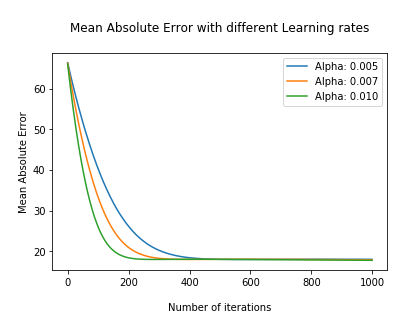

In [1125]:
for i in [0.005,0.007,0.01]:
    plt.plot(mae_train[i],label='Alpha: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nMean Absolute Error")
plt.title("\nMean Absolute Error with different Learning rates\n")
plt.show()
plt.show()

### Best Values for Experimentation 1

In [1126]:
cf_final = {}
mse_final = {}
mae_final = {}
r2_final = {}
for alpha in [0.005,0.007,0.01]:
    cf_final[alpha] = min(cf_dict[alpha])
    mse_final[alpha] = min(mse_train[alpha])
    mae_final[alpha] = min(mae_train[alpha])
    r2_final[alpha] = max(r_squared[alpha])

In [1127]:
train_metrics= pd.DataFrame([cf_final, mse_final,mae_final,r2_final],index=['CF_Train','MSE_Train','MAE_Train','R2_Train']).T

xt_test = X_test.values.transpose()
rows_test = X_test.shape[0]
cf_test = {}
mse_test = {}
mae_test = {}
r2_test = {}
for alpha in [0.005,0.007,0.01]:
    beta = beta_dict[alpha]
    pred_test = beta[0]+np.dot(beta[1:],xt_test)
    cf_test[alpha],mse_test[alpha],mae_test[alpha],r2_test[alpha] = calculate_metrics(y_test,pred_test,rows_test)
    
test_metrics=pd.DataFrame([cf_test, mse_test,mae_test,r2_test],index=['CF_Test','MSE_Test','MAE_Test','R2_Test']).T

metrics1=pd.concat([train_metrics,test_metrics],axis=1)
metrics1.reindex(sorted(metrics1.columns), axis=1)

,CF_Test,CF_Train,MAE_Test,MAE_Train,MSE_Test,MSE_Train,R2_Test,R2_Train
0.005,304.5010,293.2792,18.1977,18.0251,609.0019,586.5584,0.2564,0.2738
0.007,299.5531,288.1972,18.0840,17.9445,599.1063,576.3945,0.2685,0.2864
0.010,295.7512,284.1783,17.9523,17.8141,591.5025,568.3566,0.2778,0.2963


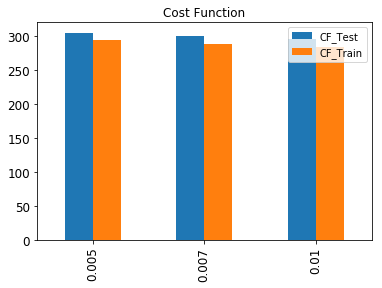

In [565]:
metrics1[['CF_Test','CF_Train']].plot(kind='bar', title ="Cost Function", legend=True, fontsize=12)

### Experimentation 2 - Thresholds

In [566]:
beta_dict,cf_dict,mse_train,mae_train,r_squared = GD_Linear(X_train, X_test, y_train, y_test,2)

Convergence with threshold 0.005000 reached at iteration 1413
Convergence with threshold 0.010000 reached at iteration 980
Convergence with threshold 0.100000 reached at iteration 347


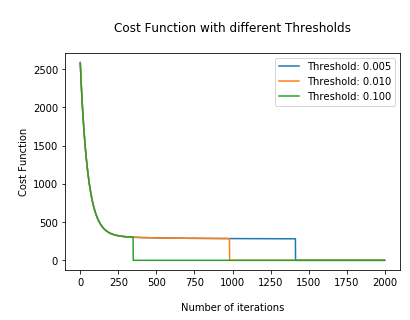

In [567]:
for i in [0.005,0.01,0.1]:
    plt.plot(cf_dict[i],label='Threshold: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nCost Function")
plt.title("\nCost Function with different Thresholds\n")
plt.show()

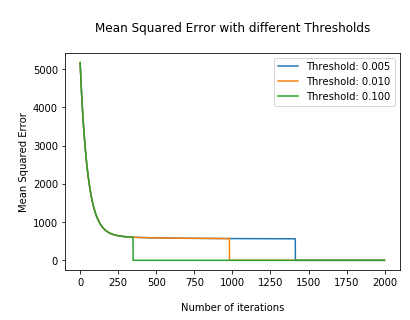

In [568]:
for i in [0.005,0.01,0.1]:
    plt.plot(mse_train[i],label='Threshold: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nMean Squared Error")
plt.title("\nMean Squared Error with different Thresholds\n")
plt.show()

### Best Values for Experimentation 2

In [570]:
cf_final = {}
mse_final = {}
mae_final = {}
r2_final = {}
for t in [0.005,0.01,0.1]:
    
    cf_dict[t].sort()
    mse_train[t].sort()
    mae_train[t].sort()
    r_squared[t].sort()
    cf_final[t] = min([x for x in cf_dict[t] if x!=0])
    mse_final[t] = min([x for x in mse_train[t] if x!=0])
    mae_final[t] = min([x for x in mae_train[t] if x!=0])
    r2_final[t] = max([x for x in r_squared[t] if x!=0])

In [571]:
train_metrics= pd.DataFrame([cf_final, mse_final,mae_final,r2_final],index=['CF_Train','MSE_Train','MAE_Train','R2_Train']).T

In [572]:
xt_test = X_test.values.transpose()
rows_test = X_test.shape[0]
cf_test = {}
mse_test = {}
mae_test = {}
r2_test = {}
for t in [0.005,0.01,0.1]:
    beta = beta_dict[t]
    pred_test = beta[0]+np.dot(beta[1:],xt_test)
    cf_test[t],mse_test[t],mae_test[t],r2_test[t] = calculate_metrics(y_test,pred_test,rows_test)

In [574]:
test_metrics=pd.DataFrame([cf_test, mse_test,mae_test,r2_test],index=['CF_Test','MSE_Test','MAE_Test','R2_Test']).T

In [575]:
metrics1=pd.concat([train_metrics,test_metrics],axis=1)
metrics1.reindex(sorted(metrics1.columns), axis=1)

,CF_Test,CF_Train,MAE_Test,MAE_Train,MSE_Test,MSE_Train,R2_Test,R2_Train
0.005,293.0501,281.2739,17.8528,17.7112,586.1001,562.5477,0.2844,0.3035
0.010,295.9267,284.3652,17.9587,17.8206,591.8534,568.7304,0.2773,0.2959
0.100,313.1375,301.9032,18.1993,18.0263,626.2751,603.8064,0.2353,0.2524


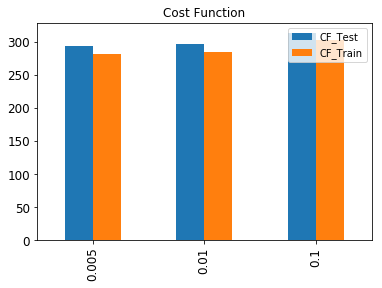

In [576]:
metrics1[['CF_Test','CF_Train']].plot(kind='bar', title ="Cost Function", legend=True, fontsize=12)

### Experimentation 3: Training and Testing on  10 Random Features

In [1129]:
random.seed(1)
random_features=random.sample(range(27), 10)

df=pd.read_csv("energydata_complete.csv")
df=df.drop(columns = ['date'])
df_no_outliers = outlier(df) ###Outlier Removal
df_scaled = feature_scaling(df_no_outliers)  ###Normalisation of features

x_random=df_scaled.iloc[:,random_features]
y=df_no_outliers['Appliances']
X_train3, X_test3, y_train, y_test = train_test_split(x_random, y, test_size=0.3,random_state=1)


# x_random = x.iloc[:,random_features]
# y=df_no_outliers['Appliances']
# X_train3, X_test3, y_train, y_test = train_test_split(x_random, y, test_size=0.3,random_state=1)
beta_dict,cf_dict,mse_train,mae_train,r_squared = GD_Linear(X_train3, X_test3, y_train, y_test,3)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1131]:
cf_final
mse_final 
r2_final
for alpha in [0.01]:
    cf_final = min(cf_dict[alpha])
    mse_final = min(mse_train[alpha])
    r2_final = max(r_squared[alpha])

In [1132]:
train_metrics3=pd.DataFrame([cf_final, mse_final,r2_final],index=['CF_Train','MSE_Train','R2_Train'],columns=['Random 10']).T

xt_test = X_test3.values.transpose()
rows_test = X_test3.shape[0]
cf_test = {}
mse_test = {}
r2_test = {}
for alpha in [0.01]:
    beta = beta_dict[alpha]
    pred_test = beta[0]+np.dot(beta[1:],xt_test)
    cf_test,mse_test,mae_test,r2_test = calculate_metrics(y_test,pred_test,rows_test)
    
test_metrics3 = pd.DataFrame([cf_test, mse_test,r2_test],index=['CF_Test','MSE_Test','R2_Test'],columns=['Random 10']).T
metrics3=pd.concat([train_metrics3,test_metrics3],axis=1)

full_model_metrics = metrics1.reindex(sorted(metrics1.columns), axis=1)
full_model_metrics = full_model_metrics.iloc[2:,[0,1,4,5,6,7]]
full_model_metrics=pd.DataFrame(full_model_metrics).T
full_model_metrics.columns=['Full Model']
full_model_metrics=pd.DataFrame(full_model_metrics).T

pd.concat([metrics3,full_model_metrics],axis=0)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,CF_Test,CF_Train,MSE_Test,MSE_Train,R2_Test,R2_Train
Random 10,338.3284,328.2843,676.6569,656.5687,0.1738,0.1871
Full Model,295.7512,284.1783,591.5025,568.3566,0.2778,0.2963


## Logistic Regression

### Creating classes for Target Variable

In [1147]:
### Splitting classes based on its Median

df_logistic = df_filter.copy()
df_logistic['Appliances_class'] = [0 if x <= 60 else 1 for x in df_logistic['Appliances']] 
df_no_outliers=outlier(df_logistic)
df_logistic = df_logistic.drop(columns = ['Appliances'])

In [1148]:
df_logistic.head()

,T1,RH_1,T2,RH_2,RH_3,RH_5,T6,RH_6,T8,RH_8,T9,RH_9,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances_class
0,19.89,47.596667,19.2,44.790000,44.730000,55.20,7.026667,84.256667,18.2,48.900000,17.033333,45.53,733.5,92.0,7.000000,63.000000,5.3,0
1,19.89,46.693333,19.2,44.722500,44.790000,55.20,6.833333,84.063333,18.2,48.863333,17.066667,45.56,733.6,92.0,6.666667,59.166667,5.2,0
2,19.89,46.300000,19.2,44.626667,44.933333,55.09,6.560000,83.156667,18.2,48.730000,17.000000,45.50,733.7,92.0,6.333333,55.333333,5.1,0
3,19.89,46.066667,19.2,44.590000,45.000000,55.09,6.433333,83.423333,18.1,48.590000,17.000000,45.40,733.8,92.0,6.000000,51.500000,5.0,0
4,19.89,46.333333,19.2,44.530000,45.000000,55.09,6.366667,84.893333,18.1,48.590000,17.000000,45.40,733.9,92.0,5.666667,47.666667,4.9,0


In [1145]:
df_logistic.shape

(19735, 18)

In [1109]:
pd.DataFrame(df_logistic['Appliances_class'].value_counts())

,Appliances_class
0,10744
1,6853


### Sigmoid Function

In [1110]:
def predict(beta,xt):
    z=beta[0]+(np.dot(beta[1:],xt))
    sigmoid = 1 / (1 + np.exp(-z))
    return(sigmoid)     

### Cost Calculation

In [1111]:
def cost_function(final_pred,y_train):
    a=y_train*np.log(final_pred)
    b=(1-y_train)*np.log(1-final_pred)
    cost=(a+b).sum()
    return(cost)

### Gradient Descent for Logistic Regression

In [1112]:
def GD_Logistic(X_train, X_test, y_train, y_test,exp):
    cf_dict={}
    beta_dict={}
    pred_proba_dict={}
    if exp == 1:
        lrate=[0.005,0.007,0.01]
    if exp == 3:
        lrate=[0.01]
    m=X_train.shape[0]
    n=X_train.shape[1]+1
    xt=X_train.values.transpose()

    for alpha in lrate:
        p_diff_cost=[0]*n
        beta=[0.05]*n
        cf=[0]*1000
        for iter in range(1000):
            for k in range(n):
                if(k == 0):
                    p_diff_cost[0]=(predict(beta,xt)-y_train).sum()
                else:
                    p_diff_cost[k]=np.dot((predict(beta,xt)-y_train),X_train.iloc[:,k-1])

            for bit in range(n):
                beta[bit]=round((beta[bit]-(alpha*p_diff_cost[bit])/m),4)

            pred_proba=predict(beta,xt)
            cf[iter]=-(cost_function(pred_proba,y_train))/m
        cf_dict[alpha]=cf
        beta_dict[alpha]=beta
        pred_proba_dict[alpha]=pred_proba
        
    return(cf_dict,beta_dict,pred_proba_dict)


### Experimentation 1: Varying Learning Rates

In [1113]:
df_logistic_scaled = feature_scaling(df_logistic)  ###Normalisation of features

x=df_logistic_scaled.iloc[:,:17]
y=df_logistic['Appliances_class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)
cf_dict,beta_dict,pred_proba_dict = GD_Logistic(X_train, X_test, y_train, y_test,1)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1116]:
beta_dict[0.01]

[-0.437,
 0.0798,
 0.3029,
 0.2156,
 -0.0554,
 0.0445,
 0.2512,
 0.1891,
 0.0643,
 0.2423,
 -0.3875,
 -0.2166,
 -0.3899,
 -0.106,
 -0.1542,
 0.1746,
 0.0261,
 -0.0095]

### Cost Fuction Plot

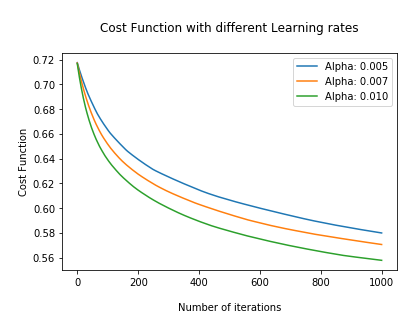

In [1114]:
for i in [0.005,0.007,0.01]:
    plt.plot(cf_dict[i],label='Alpha: %.3f' %i)
plt.legend(loc="upper right")
plt.xlabel("\nNumber of iterations")
plt.ylabel("\nCost Function")
plt.title("\nCost Function with different Learning rates\n")
plt.show()

### Values of Probabilities and Beta's for best Learning Rate

In [866]:
pred_proba = pred_proba_dict[0.01]
beta=beta_dict[0.01]

### Predicting classes based on Probability results for Training data

In [867]:
pred_class = [0 if i<=0.5 else 1 for i in pred_proba]
pred_class=pd.Series(pred_class)
pred_class.value_counts()

0    8637
1    3680
dtype: int64

### Confusion Matrix for Training Data

In [868]:
pd.DataFrame(confusion_matrix(y_train,pred_class),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,6414,1108
Actual 1,2223,2572


In [869]:
tn, fp, fn, tp = confusion_matrix(y_train,pred_class).ravel()
Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print(accuracy_score(y_train,pred_class))

0.5363920750782065
0.8526987503323584
0.7295607696679386


### Test Dataset

In [870]:
xt=X_test.values.transpose()
class_pred_test = predict(beta,xt)
test_cf = -(cost_function(class_pred_test,y_test))/m
print(test_cf)

0.23983741161543004


### Predicting classes based on Probability results for Test data

In [871]:
pred_test = [0 if i<=0.5 else 1 for i in class_pred_test]
pred_test=pd.Series(pred_test)

### Confusion Matrix for Test Dataset

In [872]:
pd.DataFrame(confusion_matrix(y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,2762,460
Actual 1,981,1077


In [874]:
tn, fp, fn, tp = confusion_matrix(y_test,pred_test).ravel()

Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print(accuracy_score(y_test,pred_test))

0.5233236151603499
0.8572315332091869
0.7270833333333333


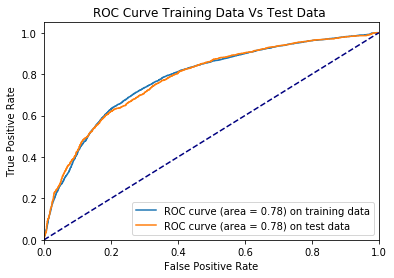

In [875]:
fpr_train1, tpr_train1, thresholds_train1 = metrics.roc_curve(y_train, pred_proba,pos_label=1)
fpr_test1, tpr_test1, thresholds_test1 = metrics.roc_curve(y_test, class_pred_test,pos_label=1)
roc_auc_train1 = metrics.auc(fpr_train1, tpr_train1)
roc_auc_test1 = metrics.auc(fpr_test1, tpr_test1)
plt.plot(fpr_train1,tpr_train1,label='ROC curve (area = %0.2f) on training data' % roc_auc_train1)
plt.plot(fpr_test1,tpr_test1,label='ROC curve (area = %0.2f) on test data' % roc_auc_test1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Training Data Vs Test Data ')
plt.legend(loc="lower right")
plt.show()

### Experimentation 3 

In [1081]:
random.seed(1)
random_features=random.sample(range(27), 10)

df=pd.read_csv("energydata_complete.csv")
df=df.drop(columns = ['date'])
df_no_outliers = outlier(df) ###Outlier Removal
df_scaled = feature_scaling(df_no_outliers)  ###Normalisation of features

df_no_outliers['Appliances_class'] = [0 if x <= 60 else 1 for x in df_no_outliers['Appliances']]
df_logistic = df_scaled.drop(columns = ['Appliances'])

x_random = df_logistic.iloc[:,random_features]
y=df_no_outliers['Appliances_class']

X_train3, X_test3, y_train, y_test = train_test_split(x_random, y, test_size=0.3,random_state=1)
cf_dict,beta_dict,pred_proba = GD_Logistic(X_train3, X_test3, y_train, y_test,3)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1002]:
X_train3.columns

Index(['RH_2', 'RH_9', 'Tdewpoint', 'RH_1', 'RH_4', 'T2', 'T8', 'RH_7',
       'Press_mm_hg', 'RH_6'],
      dtype='object')

### Exp 3 - Predicting the classes based on probabilties on Training Data 

In [1003]:
pred_class3 = [0 if i<=0.5 else 1 for i in pred_proba[0.01]]
pred_class3=pd.Series(pred_class3)
pred_class3.value_counts()

0    9021
1    3296
dtype: int64

### Exp 3 - Confusion Matrix on Training Data

In [1004]:
pd.DataFrame(confusion_matrix(y_train,pred_class3),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,6465,1057
Actual 1,2556,2239


In [1010]:
tn, fp, fn, tp = confusion_matrix(y_train,pred_class3).ravel()
Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print()
print(accuracy_score(y_train,pred_class3))

0.4669447340980188
0.859478862004786

0.7066655841519851


### Testing Data

In [1006]:
beta=beta_dict[0.01]
xt=X_test3.values.transpose()
class_pred_test = predict(beta,xt)
test_cf = -(cost_function(class_pred_test,y_test))/m
print(test_cf)

pred_test = [0 if i<=0.5 else 1 for i in class_pred_test]
pred_test=pd.Series(pred_test)

pd.DataFrame(confusion_matrix(y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

0.25253658572441856


,Predicted 0,Predicted 1
Actual 0,2787,435
Actual 1,1103,955


In [1007]:
tn, fp, fn, tp = confusion_matrix(y_test,pred_test).ravel()

Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print()
print(accuracy_score(y_test,pred_test))

0.4640427599611273
0.8649906890130353

0.7087121212121212


### ROC Curves

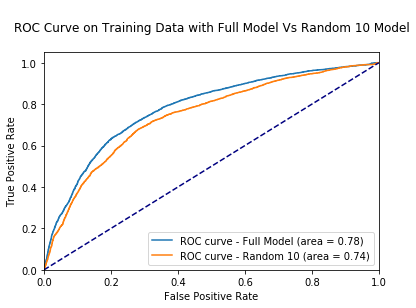

In [1011]:
fpr_train3, tpr_train3, thresholds_train3 = metrics.roc_curve(y_train, pred_proba[0.01],pos_label=1)
roc_auc_train3 = metrics.auc(fpr_train3, tpr_train3)
plt.plot(fpr_train1,tpr_train1,label='ROC curve - Full Model (area = %0.2f)' % roc_auc_train1)
plt.plot(fpr_train3,tpr_train3,label='ROC curve - Random 10 (area = %0.2f)' % roc_auc_train3)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nROC Curve on Training Data with Full Model Vs Random 10 Model\n')
plt.legend(loc="lower right")
plt.show()

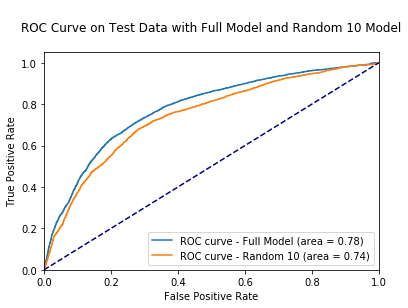

In [1013]:
fpr_test3, tpr_test3, thresholds_test3 = metrics.roc_curve(y_train, pred_proba[0.01],pos_label=1)
roc_auc_test3 = metrics.auc(fpr_test3, tpr_test3)
plt.plot(fpr_train1,tpr_train1,label='ROC curve - Full Model (area = %0.2f)' % roc_auc_test1)
plt.plot(fpr_test3,tpr_test3,label='ROC curve - Random 10 (area = %0.2f)' % roc_auc_test3)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nROC Curve on Test Data with Full Model and Random 10 Model\n')
plt.legend(loc="lower right")
plt.show()

### Experimentation 4 - Selecting the best 10 Features

In [1137]:
best_features=pd.DataFrame(df_no_outliers.corr()['Appliances']).abs()
best_features.sort_values(by=['Appliances'],ascending=False)

,Appliances
Appliances,1.000000
lights,0.291109
T8,0.268293
T2,0.264739
RH_out,0.252696
T1,0.248221
RH_6,0.240142
T6,0.223875
RH_8,0.218639
T_out,0.213651


In [1015]:
df_no_outliers.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_class
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,0


In [1134]:
df=pd.read_csv("energydata_complete.csv")
df_best_features = df.drop(columns =['date','lights','T3','T_out','rv1','rv2','RH_4','T4','T7','RH_7','T5','Press_mm_hg','RH_3','Tdewpoint','RH_5','Windspeed','RH_1','Visibility'])
df_best_no_outliers = outlier(df_best_features)
df_best_features = feature_scaling(df_best_no_outliers)

x=df_best_features.iloc[:,1:]
y=df_best_no_outliers['Appliances']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

beta_dict,cf_dict,mse_train,mae_train,r_squared = GD_Linear(X_train, X_test, y_train, y_test,4)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1135]:
for alpha in [0.01]:
    cf_final = min(cf_dict[alpha])
    mse_final = min(mse_train[alpha])
    r2_final = max(r_squared[alpha])

In [1136]:
train_metrics4=pd.DataFrame([cf_final, mse_final,r2_final],index=['CF_Train','MSE_Train','R2_Train'],columns=['Best 10']).T

xt_test = X_test.values.transpose()
rows_test = X_test.shape[0]
cf_test = {}
mse_test = {}
r2_test = {}
for alpha in [0.01]:
    beta = beta_dict[alpha]
    pred_test = beta[0]+np.dot(beta[1:],xt_test)
    cf_test,mse_test,mae_test,r2_test = calculate_metrics(y_test,pred_test,rows_test)
    
test_metrics4 = pd.DataFrame([cf_test, mse_test,r2_test],index=['CF_Test','MSE_Test','R2_Test'],columns=['Best 10']).T
metrics4=pd.concat([train_metrics4,test_metrics4],axis=1)

pd.concat([metrics3,metrics4,full_model_metrics],axis=0)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,CF_Test,CF_Train,MSE_Test,MSE_Train,R2_Test,R2_Train
Random 10,338.3284,328.2843,676.6569,656.5687,0.1738,0.1871
Best 10,315.4028,304.4411,630.8057,608.8821,0.2298,0.2462
Full Model,295.7512,284.1783,591.5025,568.3566,0.2778,0.2963


### Experimentation 4 - Logistic Regression

In [1089]:
df=pd.read_csv("energydata_complete.csv")
df=df.drop(columns = ['date'])
df_no_outliers = outlier(df) ###Outlier Removal
df_scaled = feature_scaling(df_no_outliers)  ###Normalisation of features

df_no_outliers['Appliances_class'] = [0 if x <= 60 else 1 for x in df_no_outliers['Appliances']]
df_logistic = df_scaled.drop(columns = ['Appliances'])

x_best = df_logistic.drop(columns =['lights','T3','T_out','rv1','rv2','RH_4','T4','T7','RH_7','T5','Press_mm_hg','RH_3','Tdewpoint','RH_5','Windspeed','RH_1','Visibility'])
y=df_no_outliers['Appliances_class']

X_train, X_test, y_train, y_test = train_test_split(x_best, y, test_size=0.3,random_state=1)
cf_dict,beta_dict,pred_proba = GD_Logistic(X_train, X_test, y_train, y_test,3)

c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\aashe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1117]:
x_best.columns

Index(['T1', 'T2', 'RH_2', 'T6', 'RH_6', 'T8', 'RH_8', 'T9', 'RH_9', 'RH_out'], dtype='object')

In [1090]:
pred_class4 = [0 if i<=0.5 else 1 for i in pred_proba[0.01]]
pred_class4=pd.Series(pred_class4)
pred_class4.value_counts()

0    9021
1    3296
dtype: int64

In [1091]:
pd.DataFrame(confusion_matrix(y_train,pred_class4),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,6415,1107
Actual 1,2606,2189


In [1092]:
tn, fp, fn, tp = confusion_matrix(y_train,pred_class4).ravel()
Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print()
print(accuracy_score(y_train,pred_class4))

0.4565172054223149
0.8528316936984844

0.6985467240399448


In [1093]:
beta=beta_dict[0.01]
xt=X_test.values.transpose()
class_pred_test = predict(beta,xt)
test_cf = -(cost_function(class_pred_test,y_test))/m
print(test_cf)

pred_test = [0 if i<=0.5 else 1 for i in class_pred_test]
pred_test=pd.Series(pred_test)

pd.DataFrame(confusion_matrix(y_test,pred_test),index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])

0.2522912723931678


,Predicted 0,Predicted 1
Actual 0,2758,464
Actual 1,1145,913


In [1094]:
tn, fp, fn, tp = confusion_matrix(y_test,pred_test).ravel()

Sensitivity = tp/(tp+fn)
Specificity = tn/(tn+fp)
print(Sensitivity)
print(Specificity)
print()
print(accuracy_score(y_test,pred_test))

0.44363459669582117
0.8559900682805711

0.6952651515151516


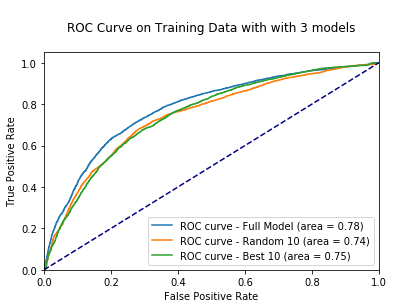

In [1099]:
fpr_train4, tpr_train4, thresholds_train4 = metrics.roc_curve(y_train, pred_proba[0.01],pos_label=1)
roc_auc_train4 = metrics.auc(fpr_train4, tpr_train4)
plt.plot(fpr_train1,tpr_train1,label='ROC curve - Full Model (area = %0.2f)' % roc_auc_train1)
plt.plot(fpr_train3,tpr_train3,label='ROC curve - Random 10 (area = %0.2f)' % roc_auc_train3)
plt.plot(fpr_train4,tpr_train4,label='ROC curve - Best 10 (area = %0.2f)' % roc_auc_train4)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nROC Curve on Training Data with with 3 models\n')
plt.legend(loc="lower right")
plt.show()

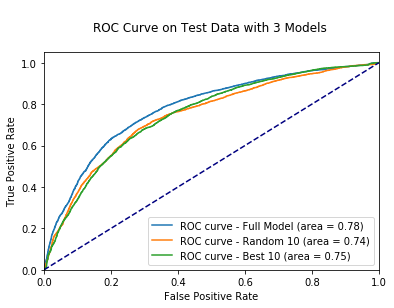

In [1100]:
fpr_test4, tpr_test4, thresholds_test4 = metrics.roc_curve(y_train, pred_proba[0.01],pos_label=1)
roc_auc_test4 = metrics.auc(fpr_test4, tpr_test4)
plt.plot(fpr_train1,tpr_train1,label='ROC curve - Full Model (area = %0.2f)' % roc_auc_test1)
plt.plot(fpr_test3,tpr_test3,label='ROC curve - Random 10 (area = %0.2f)' % roc_auc_test3)
plt.plot(fpr_test4,tpr_test4,label='ROC curve - Best 10 (area = %0.2f)' % roc_auc_train4)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nROC Curve on Test Data with 3 Models \n')
plt.legend(loc="lower right")
plt.show()